# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset. 

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [1]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Inspect the shapes of the datasets

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [4]:
# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

print("y_train_encoded:", y_train_encoded.shape)
print("y_test_encoded:", y_test_encoded.shape)

y_train_encoded: (60000, 10)
y_test_encoded: (10000, 10)


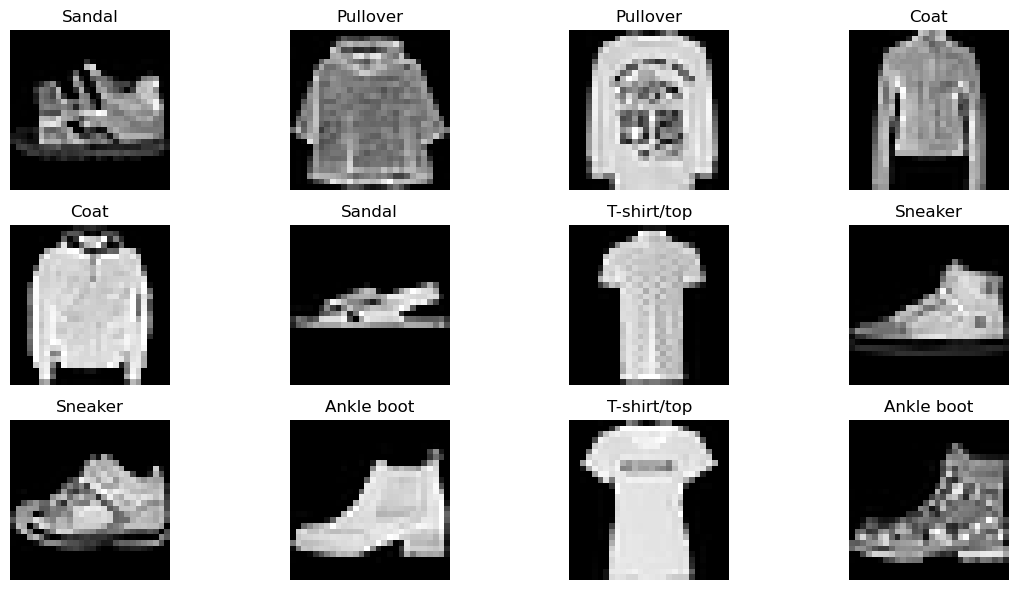

In [6]:
import matplotlib.pyplot as plt
import numpy as np
# Verify the data looks as expected

plt.figure(figsize=(12, 6))
for i in range(12):
    # pick a random index
    idx = np.random.randint(0, X_train.shape[0])
    plt.subplot(3, 4, i+1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title(class_names[y_train[idx]])
    plt.axis('off')

plt.tight_layout()
plt.show()

Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

**Your answer here**

Yes, they are 28 x 28 pixels. 

The quality es low resolution, as expected.

Yes, analyzing the data I can see there's some mislabeling for some prods.


# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam #using adam to optimize better :)

# Create a simple linear regression model
model = Sequential()

# You can use `model.add(<layer>)` to add layers to the model

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10))

# Compile the model using `model.compile()`

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with `model.fit()`

history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model with `model.evaluate()`

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/5
   1/1875 [..............................] - ETA: 5:06 - loss: 8.1938 - accuracy: 0.1562

2025-10-27 22:34:51.367018: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 1s 493us/step - loss: 2.3973 - accuracy: 0.2664 - val_loss: 2.3021 - val_accuracy: 0.2910
Epoch 2/5
1875/1875 [==============================] - 1s 441us/step - loss: 2.3027 - accuracy: 0.2982 - val_loss: 2.3021 - val_accuracy: 0.2906
Epoch 3/5
1875/1875 [==============================] - 1s 431us/step - loss: 2.3025 - accuracy: 0.2979 - val_loss: 2.3021 - val_accuracy: 0.2906
Epoch 4/5
1875/1875 [==============================] - 1s 442us/step - loss: 2.3025 - accuracy: 0.2979 - val_loss: 2.3021 - val_accuracy: 0.2906
Epoch 5/5
313/313 [==============================] - 0s 341us/step - loss: 2.3021 - accuracy: 0.2906
Test accuracy: 0.2906


Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

**Your answer here**

its accuracy is 29% which is lower than what I expected. 

its low performance can be because the model its too simple, and needs more work so it can capture the complexity of the data. I also think the wrong labelings can be playing a part.

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [ ]:
from keras.layers import Conv2D, MaxPooling2D

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) #going with recommended standard 32
model.add(MaxPooling2D((2, 2))) #I'm including maxpooling to improve model ;P

model.add(Conv2D(64, (3, 3), activation='relu')) #increasing to 64 to capture more complex patterns.
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.4853 - accuracy: 0.8231 - val_loss: 0.3586 - val_accuracy: 0.8656
Epoch 2/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.3238 - accuracy: 0.8836 - val_loss: 0.2973 - val_accuracy: 0.8907
Epoch 3/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2739 - accuracy: 0.9001 - val_loss: 0.2752 - val_accuracy: 0.8978
Epoch 4/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2398 - accuracy: 0.9119 - val_loss: 0.2722 - val_accuracy: 0.8974
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.2640 - accuracy: 0.9037
Test accuracy: 0.9037


Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

**Your answer here**

Indeed the CNN model performs way better than the baseline model we had. Accuracy rose from 0.29 to 0.9 which its substancial. I also included MaxPooling layers to improve the model's capabilities when understanding the images, while also reducing noise and dimensionality. 

# 3. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [11]:
# A. Test Hyperparameters

from keras.layers import Dropout

#build the model with a specified number of filters

def build_model(filters):
    model = Sequential([
        Conv2D(filters, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(filters * 2, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

results = []

# testing different numbers of filters
for filters in [32, 64, 128]:
    print(f"training model with {filters} filters...")
    model = build_model(filters) #re initializing model
    history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    results.append((filters, test_acc))

#  results
for filters, acc in results:
    print(f"Filters: {filters}, Test Accuracy: {acc:.4f}")


training model with 32 filters...
training model with 64 filters...
training model with 128 filters...
Filters: 32, Test Accuracy: 0.9022
Filters: 64, Test Accuracy: 0.9046
Filters: 128, Test Accuracy: 0.9062


In [15]:
# B. Test presence or absence of regularization

#build the model w/ | w/out dropout
def build_model_with_dropout(dropout_rate=None):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        *([Dropout(dropout_rate)] if dropout_rate else []),  # toggle dropout layer
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

dropout_results = []

# testing models w/ & w/out dropout
for dropout_rate in [None, 0.3]:
    print(f"Training model with dropout rate {dropout_rate}...")
    model = build_model_with_dropout(dropout_rate)
    history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    dropout_results.append((dropout_rate, test_acc))

#  results
for dropout_rate, acc in dropout_results:
    print(f"Dropout Rate: {dropout_rate}, Test Accuracy: {acc:.4f}")


Training model with dropout rate None...
Training model with dropout rate 0.3...
Dropout Rate: None, Test Accuracy: 0.8914
Dropout Rate: 0.3, Test Accuracy: 0.8978


Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

**Your answer here**

Both, changing filters and including a regularization technique improved the model, but not much, just barely.
We could include them, or not, depending on our machine capability. I wouldn't, accuracy is not significantly changed for both.

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [24]:
def build_final_model(dropout_rate=0.3):
    model = Sequential([
        Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

final_model = build_final_model(dropout_rate=0.3)
final_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

test_loss, test_acc = final_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/10
1500/1500 [==============================] - 36s 24ms/step - loss: 0.4923 - accuracy: 0.8215 - val_loss: 0.3269 - val_accuracy: 0.8794
Epoch 2/10
1500/1500 [==============================] - 38s 25ms/step - loss: 0.3267 - accuracy: 0.8821 - val_loss: 0.2938 - val_accuracy: 0.8917
Epoch 3/10
1500/1500 [==============================] - 40s 27ms/step - loss: 0.2806 - accuracy: 0.8973 - val_loss: 0.2704 - val_accuracy: 0.8992
Epoch 4/10
1500/1500 [==============================] - 36s 24ms/step - loss: 0.2490 - accuracy: 0.9084 - val_loss: 0.2764 - val_accuracy: 0.9003
Epoch 5/10
1500/1500 [==============================] - 36s 24ms/step - loss: 0.2248 - accuracy: 0.9183 - val_loss: 0.2488 - val_accuracy: 0.9061
Epoch 6/10
1500/1500 [==============================] - 36s 24ms/step - loss: 0.2030 - accuracy: 0.9257 - val_loss: 0.2579 - val_accuracy: 0.9114
Epoch 7/10
1500/1500 [==============================] - 36s 24ms/step - loss: 0.1822 - accuracy: 0.9321 - val_loss: 0.2505 -

Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

**Your answer here**

performs a lot better, although there wasn't a lot of contribution playing with the hyperparameters. I think the layers made the difference here, also including ADAM.

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 26/10/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
    * The Lab 3 notebook (labs/lab_3.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-7-help-ml`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.